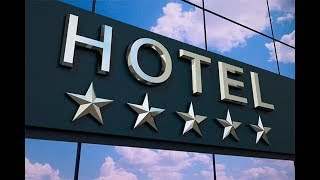

In [ ]:
from IPython.display import Image
Image("image/hotel.jpeg", width=900)


# 0.0. IMPORTS

In [2]:
import pandas as pd
import numpy as np


## 0.1 Helper Functions

In [ ]:


def jupyter_settings():
    %matplotlib inline 
             
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') ) 
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

## 0.2. Loading data

In [ ]:
df_train = pd.read_csv('../hachday_hotel-chain/dataset/train.csv')
df_test  = pd.read_csv('../hachday_hotel-chain/dataset/test.csv')
sub_m = pd.read_csv('../hachday_hotel-chain/dataset/submission.csv')

In [ ]:
df = df_train.copy()

# 1.0. DATA DESCRIPTION

# 2.0. FEATUREENGINEEERING

# 3.0. FILTERING OF VARIABLES

# 4.0. EXPLORATORY DATA ANALYSIS

# 5.0. DATA PREPARATION

In [61]:

import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [62]:
train = pd.read_csv('dataset/train.csv')


In [63]:
train = train.rename(columns={'Classificação do hotel': 'hotel_rating', 'Meses da reserva até o check-in': 'month_booking',
                        'Número de pernoites reservadas': 'number_stays_booking', 'Número de hospedes': 'number_guests',
                        'Regime de alimentação': 'meal_regime', 'Nacionalidade': 'nationality', 'Forma de Reserva': 'reservation_Form',
                        'Já se hospedou anterioremente': 'previously_hosted', 'Tipo do quarto reservado': 'type_booked_room',
                        'Reserva feita por agência de turismo': 'tourism_agency_booking', 'Reserva feita por empresa': 'company_booking',
                        'Reserva com Estacionamento': 'parking_Reservation', 'Reserva com Observações': 'reservation_Observations', 'Reserva Cancelada': 'booking_canceled'})

In [64]:
dicionario = pd.DataFrame([{'Classificação do hotel': 'hotel_rating', 'Meses da reserva até o check-in': 'month_booking',
                        'Número de pernoites reservadas': 'number_stays_booking', 'Número de hospedes': 'number_guests',
                        'Regime de alimentação': 'meal_regime', 'Nacionalidade': 'nationality', 'Forma de Reserva': 'reservation_Form',
                        'Já se hospedou anterioremente': 'previously_hosted', 'Tipo do quarto reservado': 'type_booked_room',
                        'Reserva feita por agência de turismo': 'tourism_agency_booking', 'Reserva feita por empresa': 'company_booking',
                        'Reserva com Estacionamento': 'parking_Reservation', 'Reserva com Observações': 'reservation_Observations', 'Reserva Cancelada': 'booking_canceled'}])

dicionario = dicionario.T

## 5.1 Rescaling

In [65]:
train = train[train['number_guests'] > 0]


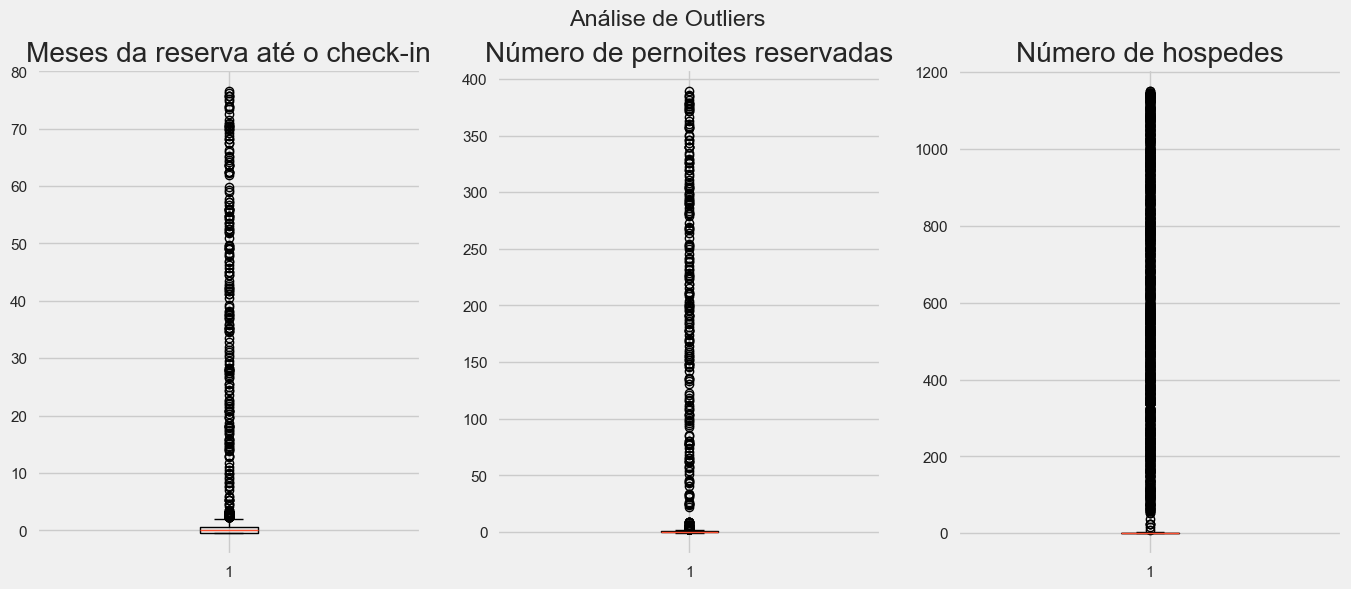

In [24]:
# Percebe-se que há outiliers extremos que não condiz com a realidade, porém para esse  ciclo vou considera-lo como parte do fenômeno.
# Em primeira análise vou apenas entender os dados para desidir qual forma de reescala eu utilizarei.
# Criação do gráfico de análise de outliers
fig, (x1, x2, x3) = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle('Análise de Outliers')

x1.set_title('Meses da reserva até o check-in')
x1.boxplot(train['month_booking'])

x2.set_title('Número de pernoites reservadas')
x2.boxplot(train['number_stays_booking'])

x3.set_title('Número de hospedes')
x3.boxplot(train['number_guests'])

plt.show()

In [66]:


rs = RobustScaler()

# Meses da reserva até o check-in
train['month_booking'] = rs.fit_transform(train[['month_booking']].values)
# Número de pernoites reservadas
train['number_stays_booking'] = rs.fit_transform(train[['number_stays_booking']].values)
# Número de Hospedes
train['number_guests'] = rs.fit_transform(train[['number_guests']].values)


## 5.2 Transform

### 5.2.1 Encoding

In [67]:

#OBSERVAÇÃO PARA UM PROXIMO CICLO: Utilizar Target encoder em nationality


# Label Encoding
# Label Encoder
le = LabelEncoder()
label_cols = ['reservation_Form', 'type_booked_room', 'nationality']
for col in label_cols:
    train[col] = le.fit_transform(train[col])
    
# Ordinal Enconding
meal_regime = {'Café da manha e jantar': 2, 'Café da manha': 1, 'Sem refeicao': 0, 'Café da manha, almoco e jantar':3 }
classificacao_dict = {'5 estrelas': 5, '4 estrelas': 4}
observation = {'Nenhuma': 0, '1 a 3': 1,'Mais de 3': 2 }

#hotel_rating
train['hotel_rating'] = train['hotel_rating'].map(classificacao_dict)

# Regime de alimentação
train['meal_regime'] = train['meal_regime'].map(meal_regime)

# reservation_Observations
train['reservation_Observations'] = train['reservation_Observations'].map(observation)


#booleano
bool_cols = ['previously_hosted','tourism_agency_booking','company_booking','parking_Reservation']
for col in bool_cols:
    train[col] = train[col].apply(
        lambda x: 0 if x == 'Não' else 1 if x == 'Sim' else x)

In [68]:
train.head(2)

,id,hotel_rating,month_booking,number_stays_booking,number_guests,meal_regime,nationality,reservation_Form,previously_hosted,type_booked_room,tourism_agency_booking,company_booking,parking_Reservation,reservation_Observations,booking_canceled
0,33571,5,0.4,1.0,0.0,2,53,0,0,0,1,0,1,0,0
1,82458,4,32.8,0.0,0.0,1,140,0,0,0,1,0,0,0,1


# 7.0.  MACHINE LEARNING MODELLING

# 8.0.  HYPERPARAMETER FINE TUNING

# 9.0. TRADUCAO E INTERPRETACAO DO ERRO

# 10.0.DEPLOY MODEL TO PRODUCTION